# EDA ON DATA PROFESSIONALS SALARIES

## About the dataset

The data was downloaded from Kaggle datasets: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/download?datasetVersionNumber=1

Data Science Job Salaries  Dataset contains 11 columns, each are: 



1.  work_year: The year salary was paid.



2.  experience_level: The experience level in the job during the year.
      
      
      
3.  employment_type: The type of employment for the role.
      
      
      
4.  job_title: The role worked in during the year.



5.  salary: The total gross salary amount paid.



6.  salary_currency: The currency of the salary paid as an ISO 4217 currency code.



7.  salary_in_usd: The salary in USD.



8.  employee_resisdence: Employee's primary country of resisdence during the work year as an ISO 3166 country code(Alpha-2 code).



9.  remote_ratio: The overall amount of work done remotely:
        (a) 0 = No remote work (less than 20%),
        (b) 50 = Partially remote,
        (c) 100 = Fully remote(more than 80%).
        
        
        
10. company_location: The country of the employer's main office or contracting branch.



11. company_size: The average number of people that worked for the company during the year.
        (a) S (small) = less than 50 employees,
        (b) M (medium) = 50-250 employees ,
        (c) L (large) = more than 250 employees.

### Problem Statement

#### To Identify:
    
(1) Which Experience level has the highest hiring?

(2) Which Employment type does company hire most?

(3) Which Job Title has the highest pay?

(4) Does the Company size affect the rate of hiring and pay.

(5) Where are the most employee residences
 

## Importing Libraries

In [63]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
'%matplotlib inline'
import seaborn as sns

import plotly.express as px

import nltk
!pip install nltk

!pip install wordcloud
from wordcloud import WordCloud

In [64]:
#Load dataset
salary = pd.read_csv('ds_salaries.csv')

In [65]:
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [66]:
#Check column information
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [67]:
#Summary statistics of dataset
salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [68]:
#lets get the shape of the dataset
salary.shape

(3755, 11)

In [69]:
#Check for columns label
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [70]:
salary.rename(columns ={'work_year':'Work_year', 'experience_level':'Experience_level', 'employment_type':'Employment_type','job_title':'Job_title', 'salary':'Salary','salary_currency':'Salary_currency', 'salary_in_usd':'Salary_in_usd', 'employee_residence':'Employee_residence', 'remote_ratio':'Remote_ratio', 'company_location':'Company_location', 'company_size':'Company_size' }, inplace=True)
#renaming the columns name.

In [71]:
salary

,Work_year,Experience_level,Employment_type,Job_title,Salary,Salary_currency,Salary_in_usd,Employee_residence,Remote_ratio,Company_location,Company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## Data Cleaning

##### .isna() is used to check for the null values.

In [72]:
salary.isna()

,Work_year,Experience_level,Employment_type,Job_title,Salary,Salary_currency,Salary_in_usd,Employee_residence,Remote_ratio,Company_location,Company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


##### .isna().sum() is used to count for the number of null values in each column

In [73]:
salary.isna().sum()

Work_year             0
Experience_level      0
Employment_type       0
Job_title             0
Salary                0
Salary_currency       0
Salary_in_usd         0
Employee_residence    0
Remote_ratio          0
Company_location      0
Company_size          0
dtype: int64

In [74]:
#Checking if there is duplicate values
salary.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool

In [75]:
#Checking for the total number of duplicate values.
salary.duplicated().sum()

1171

##### .drop_duplicates() is used to drop duplicate

In [76]:
salary.drop_duplicates()

,Work_year,Experience_level,Employment_type,Job_title,Salary,Salary_currency,Salary_in_usd,Employee_residence,Remote_ratio,Company_location,Company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [77]:
salary.drop_duplicates(inplace=True)

In [78]:
salary

,Work_year,Experience_level,Employment_type,Job_title,Salary,Salary_currency,Salary_in_usd,Employee_residence,Remote_ratio,Company_location,Company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## Exploratory Data Analysis

### Experience Level

In [79]:
counts= salary.Experience_level.value_counts()
counts

SE    1554
MI     664
EN     270
EX      96
Name: Experience_level, dtype: int64

### SE - Senior Expertise,  MI - Mid -Intermediate, EN- Entry level, EX- Executive

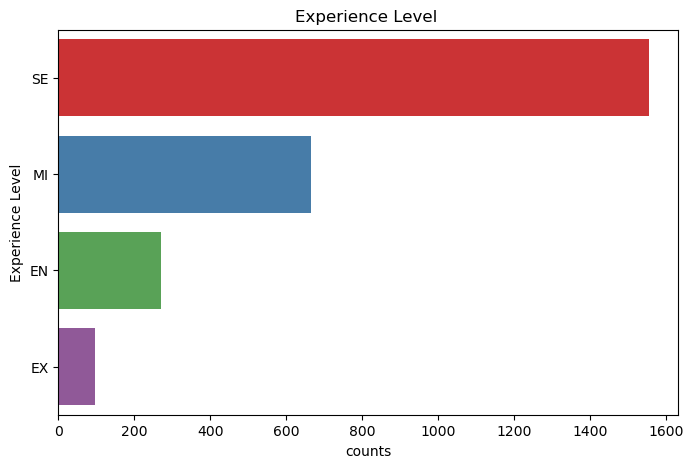

In [80]:
plt.figure(figsize=(8, 5))

counts = salary['Experience_level'].value_counts()
sns.barplot(x=counts.values, y=counts.index)

plt.title('Experience Level ')
plt.xlabel('counts')
plt.ylabel('Experience Level')
plt.show()

####  From the above bar chart, Senior expertise is higher by counts, senior expertise mostly requires experience. Senior expertise are the highest hire maybe because of their experience level.

#### Salaries of Employees Based on Experience Level

In [81]:
labels = {'Experience_level':'experience_level', 'Salary_in_usd':'salary_in_usd'}

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

px.box(salary, x = 'Experience_level', y= 'Salary_in_usd', color = 'Experience_level',labels=labels, title='<b>Salary by Experience Level')

#### Executive has more pay by salary compared to mid-intermediate, entry-level and senior expertise.

### Job Title

In [82]:
print('Total Job title:', salary['Job_title'].value_counts().size)

Total Job title: 93


In [83]:
job_title_count=salary['Job_title'].value_counts()
job_title_count


Data Engineer                               598
Data Scientist                              538
Data Analyst                                396
Machine Learning Engineer                   206
Analytics Engineer                           91
Research Scientist                           65
Data Architect                               64
Data Science Manager                         52
ML Engineer                                  34
Research Engineer                            33
Applied Scientist                            31
Machine Learning Scientist                   26
Data Science Consultant                      23
Data Manager                                 23
Computer Vision Engineer                     18
Data Analytics Manager                       18
AI Scientist                                 16
BI Data Analyst                              15
Business Data Analyst                        15
Data Specialist                              12
Applied Machine Learning Scientist      

In [84]:
top_20_job_titles = job_title_count[:20]

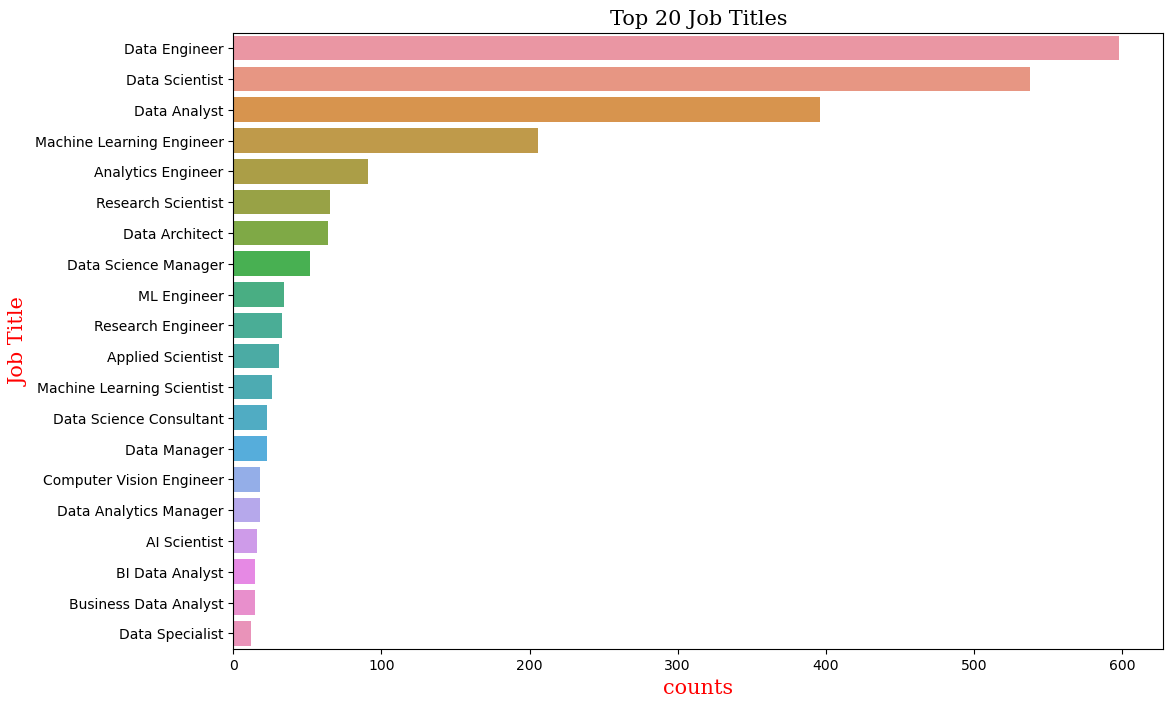

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_job_titles.values, y=top_20_job_titles.index)


font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}


plt.title('Top 20 Job Titles', fontdict=font1)
plt.xlabel('counts', fontdict=font2)
plt.ylabel('Job Title', fontdict=font2)
plt.show()

#### Data Engineer, Data Scientist and Data Analyst are the top 3 job title though other job titles are also related to the 3 job titles. 


## WordCloud of Job Title

In [86]:
def Freq_salary(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    salary_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index', columns=['Frequency'])
    salary_freq.index.name = 'Term'
    salary_freq.reset_index(inplace=True)  # Add this line to include the 'Term' column
    return salary_freq

def Word_Cloud(data, color_background, colormap, title):
    
    plt.figure(figsize = (20,15))
    
    wc= WordCloud(width=1200, height=600, max_words = 50, colormap = colormap, max_font_size =100, random_state =88, background_color = color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation = 'bilinear')
    
    plt.title(title, fontsize = 22)
    
    plt.axis('off')
    
    plt.show()

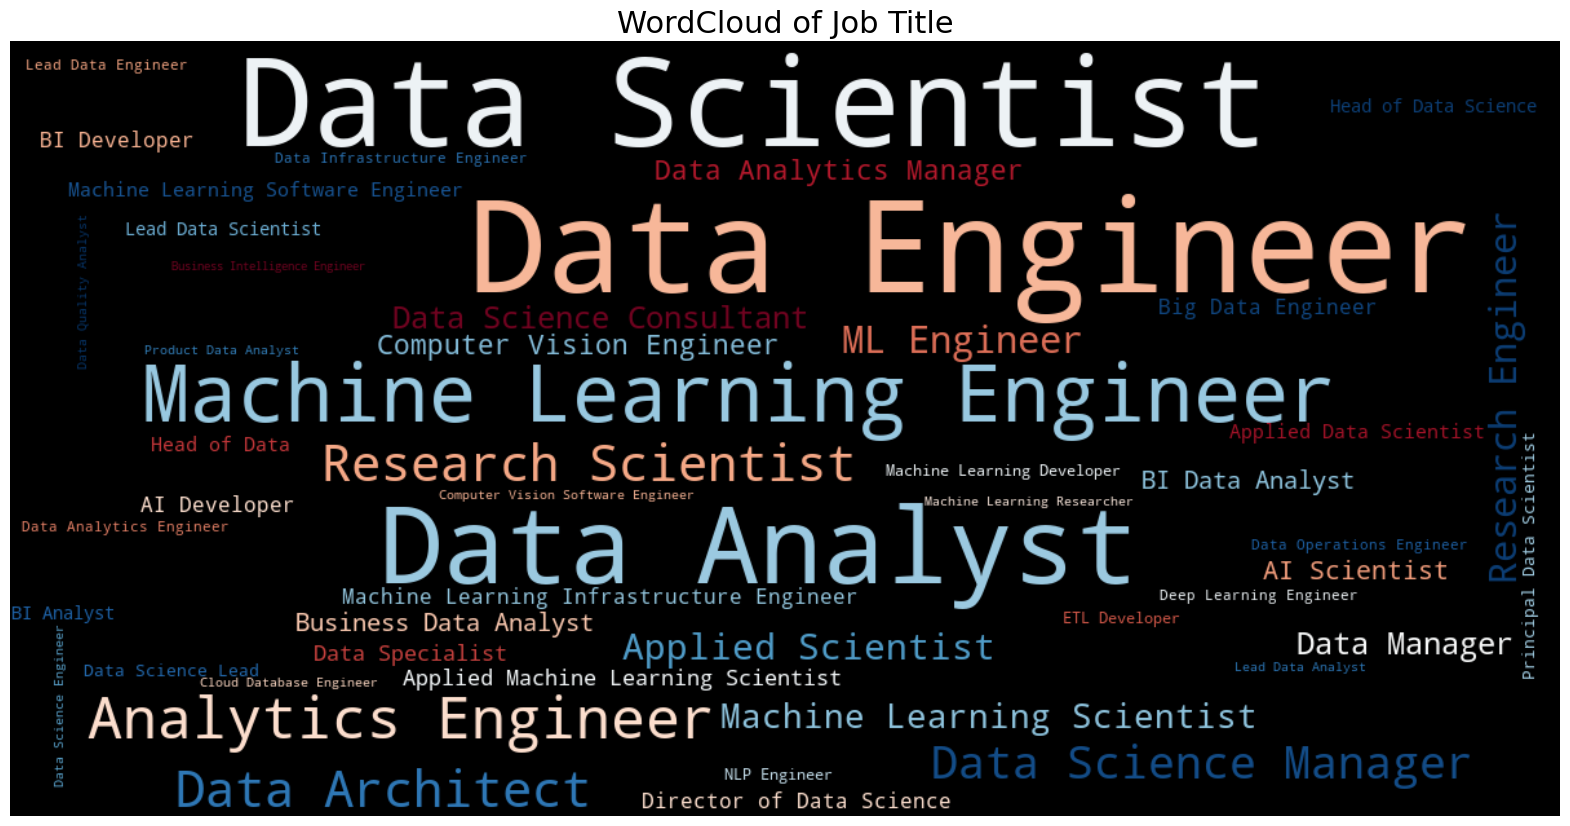

In [87]:
freq_salary = Freq_salary(salary['Job_title'].values.tolist())

data = dict(zip(freq_salary['Term'].tolist(), freq_salary['Frequency'].tolist()))

data = freq_salary.set_index('Term').to_dict()['Frequency']


Word_Cloud(data, 'black', 'RdBu', 'WordCloud of Job Title')

### Salary Distribution

In [88]:
salaryusd= salary['Salary_in_usd'].value_counts()
salaryusd

100000    58
150000    56
120000    51
200000    47
130000    39
          ..
314100     1
195800     1
262500     1
209450     1
94665      1
Name: Salary_in_usd, Length: 1035, dtype: int64

In [89]:
first_15_salary_usd=salaryusd[ :15]

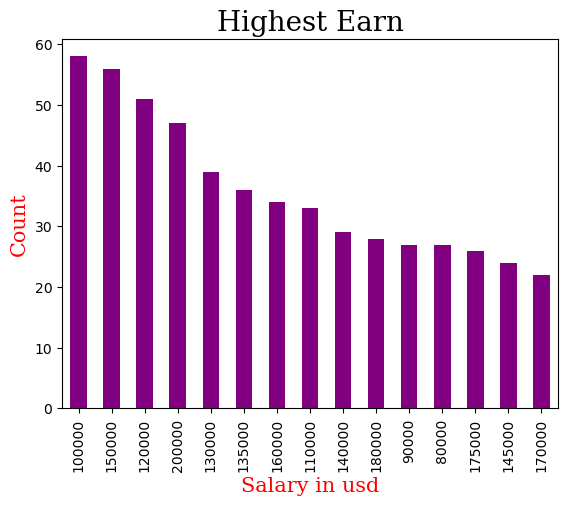

In [90]:
first_15_salary_usd.plot(kind= 'bar', color='purple')

font1= {'family':'serif', 'color':'black', 'size':20}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.title('Highest Earn', fontdict=font1)
plt.xlabel('Salary in usd', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.show()

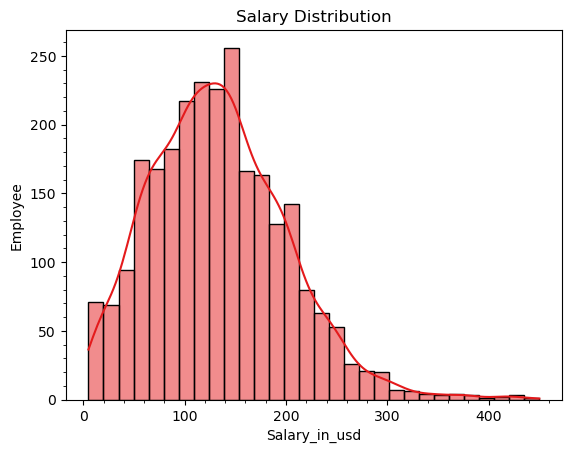

In [91]:
sns.histplot(salary['Salary_in_usd']/1000,
bins = 30, kde=True)


plt.title ('Salary Distribution')

plt.xlabel ('Salary_in_usd')

plt.ylabel ('Employee')

plt.minorticks_on()

#### The salary distribution is positively skewed

In [92]:
salary_1=salary['Salary_currency'].value_counts()
salary_1

USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: Salary_currency, dtype: int64

In [93]:
first_10_salary_currency = salary_1[ :8]

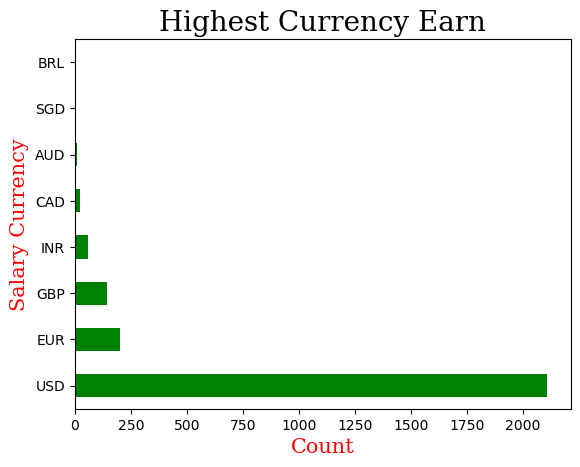

In [94]:
first_10_salary_currency.plot(kind = 'barh', color='green')

font1= {'family':'serif', 'color':'black', 'size':20}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.title('Highest Currency Earn', fontdict=font1)
plt.xlabel('Count', fontdict=font2)
plt.ylabel('Salary Currency', fontdict=font2)
plt.show()

#### The company pays the employees  more  in USD compared to the other currency.

In [95]:
new_salary = salary.groupby('Job_title', as_index = False) ['Salary_in_usd'].mean().tail()
new_salary

,Job_title,Salary_in_usd
88,Research Engineer,165909.393939
89,Research Scientist,153486.369231
90,Software Data Engineer,62510.000000
91,Staff Data Analyst,15000.000000
92,Staff Data Scientist,105000.000000


In [96]:
DF = salary.groupby('Job_title', as_index = False) ['Salary_in_usd'].mean().head()
DF

,Job_title,Salary_in_usd
0,3D Computer Vision Researcher,21352.250000
1,AI Developer,136666.090909
2,AI Programmer,55000.000000
3,AI Scientist,110120.875000
4,Analytics Engineer,150151.747253


## Company Size

In [97]:
salary['Company_size'].value_counts()

M    2028
L     409
S     147
Name: Company_size, dtype: int64

#### S = Small             M = Medium                  L = Large  

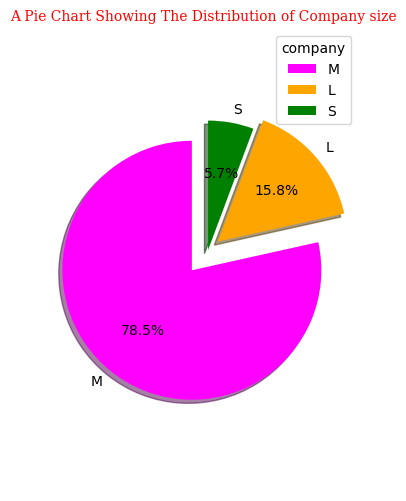

In [98]:
company = salary['Company_size'].value_counts()
label = company.index
sizes = company.values
color = ['magenta', 'orange', 'green']
explode = (0.2,0.1,0)

font1= {'family':'serif', 'color':'red', 'size':10}
font2= {'family':'serif', 'color':'purple', 'size':15}

plt.figure(figsize = (4,6))
plt.pie(company, labels = label, autopct = '%1.1f%%', startangle = 90, colors = color, explode = explode, shadow = True)
plt.title('A Pie Chart Showing The Distribution of Company size', fontdict=font1)
plt.legend(title = 'company', loc = 'best')
plt.axis('equal')
plt.show()

#### Medium Firm is higher than the other firm by 78.5%, large Firm is 15.8% while Small Firm is 5.7%.

### Company size By Remote Ratio

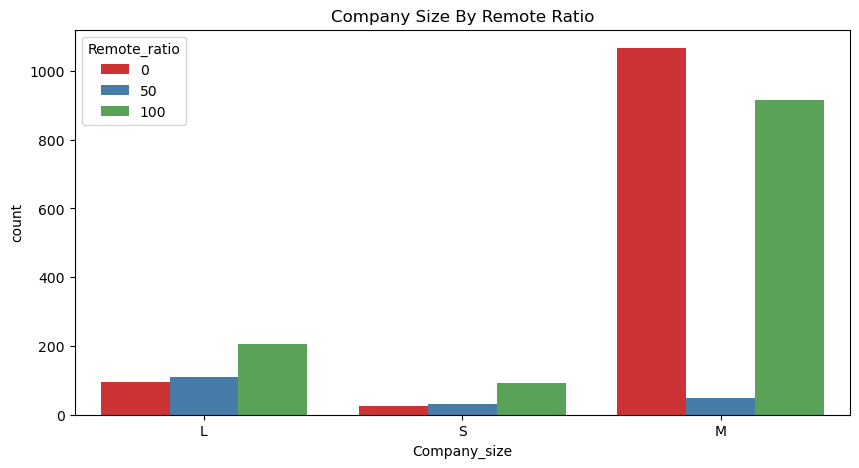

In [99]:
plt.figure(figsize=(10, 5))

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

sns.set_palette('Set1')  
ax = sns.countplot(data=salary, x='Company_size', hue='Remote_ratio')
ax.set_title('Company Size By Remote Ratio')

plt.show() 

#### Medium firm provide maximum onsite opportunities and minimum fully remote work.

### Work Year

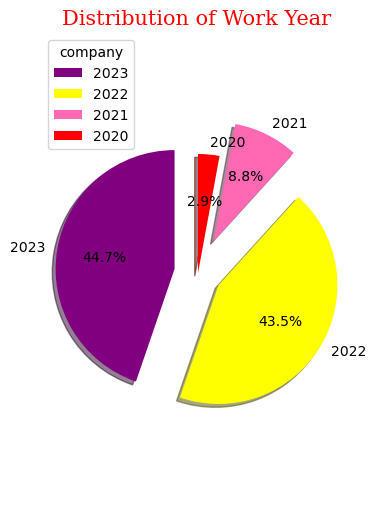

In [100]:
company = salary['Work_year'].value_counts()
label = company.index
sizes = company.values
color = ['purple', 'yellow', 'hotpink', 'red']
explode = (0.2, 0.2, 0.3, 0)

font1= {'family':'serif', 'color':'wine', 'size':20}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.figure(figsize = (4,6))
plt.pie(company, labels = label, autopct = '%1.1f%%', startangle = 90, colors = color, explode = explode, shadow = True)
plt.title('Distribution of Work Year', fontdict=font2, loc='center')
plt.legend( title = 'company',loc = 'upper left')
plt.axis('equal')
plt.show()

#### The company has more employees in 2023 about 44.7% than the other work year while 2022 has 43.5%. 2021 has 8.8% .  2020 has 2.9%: Decrease in 2020 maybe due to COVID pandemic.

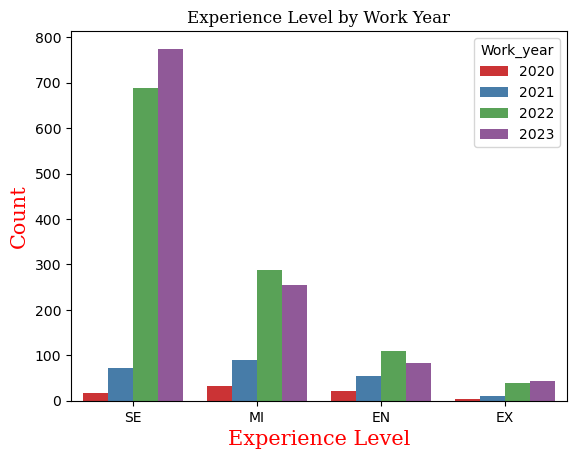

In [101]:
sns.countplot(x = 'Experience_level', hue = 'Work_year', data= salary)

font1= {'family':'serif', 'color':'black', 'size':12}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.title('Experience Level by Work Year', fontdict=font1)
plt.xlabel('Experience Level', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.show()

#### From the above chart, There is an increase in the number of senior expertise employed in 2023 but low intake of senior expertise in 2020, there was low intake of executive in 2020,2021,2022 and 2023.

### Company Location

In [102]:
salary['Company_location'].value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
ES      44
FR      33
BR      15
AU      14
PT      14
NL      13
GR      11
MX      10
IE       7
SG       6
AT       6
JP       6
TR       5
CH       5
NG       5
PL       5
PK       4
LV       4
DK       4
IT       4
PR       4
SI       4
BE       4
CO       4
UA       4
HR       3
TH       3
RU       3
AR       3
CZ       3
AE       3
FI       3
AS       3
LU       3
HU       2
ID       2
LT       2
RO       2
SE       2
KE       2
EE       2
CF       2
IL       2
GH       2
EG       1
MD       1
CL       1
NZ       1
CN       1
IQ       1
DZ       1
HK       1
HN       1
MY       1
AL       1
MA       1
PH       1
BO       1
VN       1
AM       1
BA       1
SK       1
MK       1
BS       1
IR       1
CR       1
MT       1
Name: Company_location, dtype: int64

### Employment Type

In [103]:
Employment_type = salary.Employment_type.value_counts()
Employment_type

FT    2547
PT      17
CT      10
FL      10
Name: Employment_type, dtype: int64

#### FT: (FULL-TIME) ,          CT: (CONTRACT) ,     FL: (FREELANCE),        PT: (PART-TIME). 

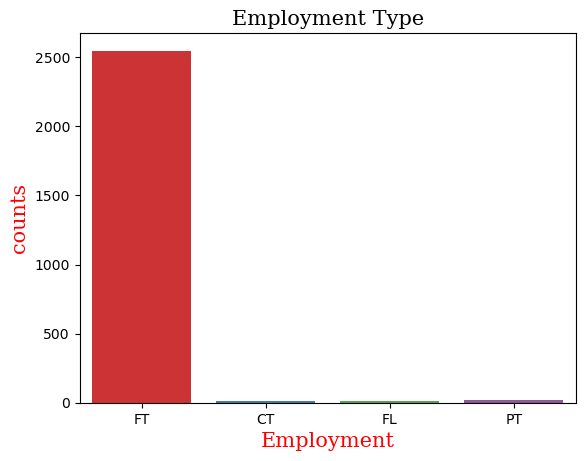

In [104]:
sns.countplot(x = 'Employment_type',data= salary)

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.title('Employment Type', fontdict=font1)
plt.xlabel('Employment', fontdict=font2)
plt.ylabel('counts', fontdict=font2)
plt.show()

#### From the above chart, the employees are mostly full time staff. The company rarely take in contract staff, freelance staff and part-time staff. The company prefers to hire full time employee maybe because of their commitment to work.

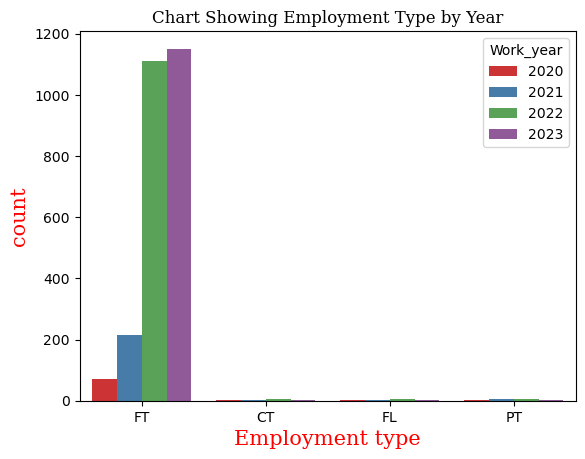

In [105]:
sns.countplot(x = 'Employment_type', hue='Work_year', data= salary)

font1= {'family':'serif', 'color':'black', 'size':12}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.title('Chart Showing Employment Type by Year', fontdict=font1)
plt.xlabel('Employment type', fontdict=font2)
plt.ylabel('count', fontdict=font2)
plt.show()

#### From the above chart,  There was an increase in the number of full-time staff in 2023 compared to 2020. 

### Employee Residence

In [106]:
Employee_residence = salary.Employee_residence.value_counts()
Employee_residence

US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
GR      13
AU      11
MX      10
IT       8
PK       8
JP       7
IE       7
NG       7
AT       6
AR       6
PL       6
PR       5
TR       5
BE       5
SG       5
RU       4
LV       4
UA       4
CO       4
CH       4
SI       4
BO       3
DK       3
HR       3
HU       3
RO       3
TH       3
AE       3
VN       3
HK       2
UZ       2
PH       2
CF       2
CL       2
FI       2
CZ       2
SE       2
AS       2
LT       2
GH       2
KE       2
DZ       1
NZ       1
JE       1
MY       1
MD       1
IQ       1
BG       1
LU       1
RS       1
HN       1
EE       1
TN       1
CR       1
ID       1
EG       1
DO       1
CN       1
SK       1
IR       1
MA       1
IL       1
MK       1
BA       1
AM       1
CY       1
KW       1
MT       1
Name: Employee_residence, dtype: int64

In [107]:
Employee_residence = salary.Employee_residence.value_counts()

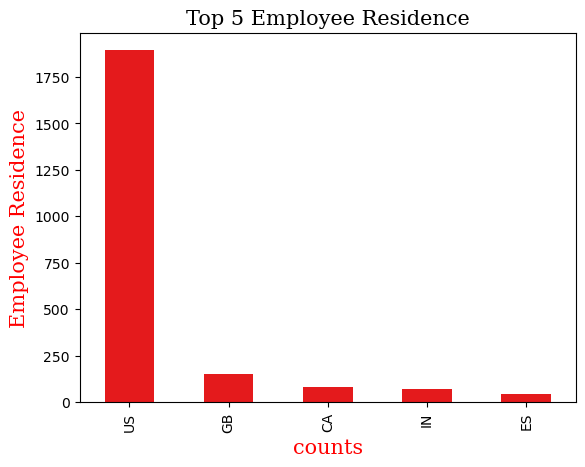

In [108]:
Employee_residence = Employee_residence[:5]
Employee_residence.plot(kind = 'bar')

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}


plt.title('Top 5 Employee Residence', fontdict=font1)
plt.xlabel('counts', fontdict=font2)
plt.ylabel('Employee Residence', fontdict=font2)
plt.show()

#### Most of the employees are domiciled in the USA  probably because USA have much higher wages than the other countries

### Remote Ratio

In [109]:
Remote_ratio = salary.Remote_ratio.value_counts()
Remote_ratio

100    1211
0      1186
50      187
Name: Remote_ratio, dtype: int64

In [110]:
labels= ['Fully Remote', 'On-site', 'Partially Remote']

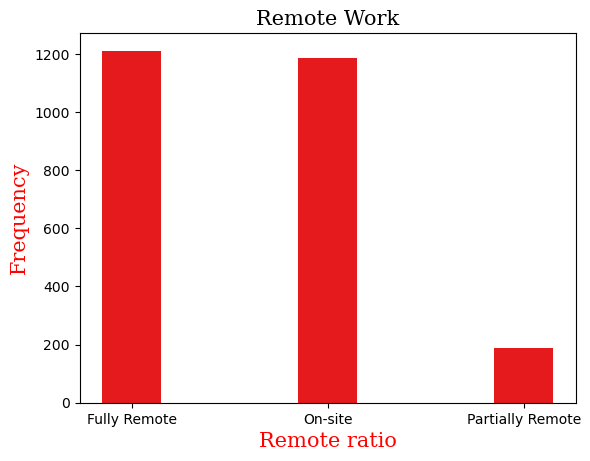

In [111]:
plt.bar(x = labels, height = Remote_ratio.values, width = 0.3)
Remote_ratio= salary.Remote_ratio.value_counts()

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}



plt.title('Remote Work', fontdict=font1)

plt.xlabel('Remote ratio', fontdict=font2)
plt.ylabel('Frequency', fontdict=font2)

plt.show()

#### From the chart, the employee works 0% of the time or 100% of the time compared to those that work 50%. This could mean that the company are either adopting a Fully remote or On-site culture rather than a Hybrid approach.  

### Salaries of Employees Based on Employment Type

In [112]:
labels = {'Employment_type':'employment_type', 'Salary_in_usd':'salary_in_usd'}

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

px.box(salary, x = 'Employment_type', y= 'Salary_in_usd', color = 'Employment_type',labels=labels, title='<b>Salary by Employment type')

#### Full time has better salaries than contract, freelance, and part-time maybe because they are more committed to their work compared to the other employment type.

### Average Salary By Employment type

In [113]:
salary.groupby('Employment_type')['Salary_in_usd'].mean()

Employment_type
CT    113446.900000
FL     51807.800000
FT    134434.613271
PT     39533.705882
Name: Salary_in_usd, dtype: float64

### Salaries of Employees Based on Company Size

In [114]:
salaryinusd_by_company_size = salary.groupby(['Salary_in_usd', 'Company_size']).size().reset_index(name='count')
top_10_companysize = salaryinusd_by_company_size.groupby('Company_size').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print('Salary in USD by Company Size:')
print(top_10_companysize)

Salary in USD by Company Size:
    Salary_in_usd Company_size  count
0          100000            L     10
1          150000            L      8
2          200000            L      7
3           80000            L      6
4          135000            L      6
5           50000            L      5
6          110000            L      5
7          160000            L      5
8          115000            L      4
9          120000            L      4
10         150000            M     47
11         100000            M     46
12         120000            M     42
13         130000            M     34
14         200000            M     34
15         135000            M     30
16         160000            M     27
17         140000            M     26
18         175000            M     26
19         110000            M     25
20          50000            S      6
21         200000            S      6
22         120000            S      5
23          10000            S      3
24          20000  

#### The medium firm pays more salary than Large and small firms. This could be due to the fact that the large firm has more financial commitment to the other sectors owing to their large size or simply put they have more employees to pay.
    

### Grouping Job Title and Experience Level 

In [115]:
pd.options.display.max_rows = 999

salary = pd.read_csv('ds_salaries.csv')
jobtitle_by_experiencelevel = salary.groupby(['job_title', 'experience_level']).size().reset_index(name='count')
top_10_experiencelevel = jobtitle_by_experiencelevel.groupby('experience_level').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print('Job Titles by Experience Level:')
print(top_10_experiencelevel)

Job Titles by Experience Level:
                     job_title experience_level  count
0                Data Engineer               EN     66
1                 Data Analyst               EN     63
2               Data Scientist               EN     59
3    Machine Learning Engineer               EN     21
4            Research Engineer               EN     10
5           Research Scientist               EN      9
6                 AI Scientist               EN      7
7      Data Science Consultant               EN      7
8                 AI Developer               EN      6
9            Applied Scientist               EN      6
10               Data Engineer               EX     51
11              Data Scientist               EX     12
12          Analytics Engineer               EX      8
13    Director of Data Science               EX      8
14        Head of Data Science               EX      7
15                Head of Data               EX      6
16        Data Science Manager   

#### Data engineers seems to have more of entry-level, mid-intermediate, executive and senior expertise than Data Scientist and Data Analyst. 

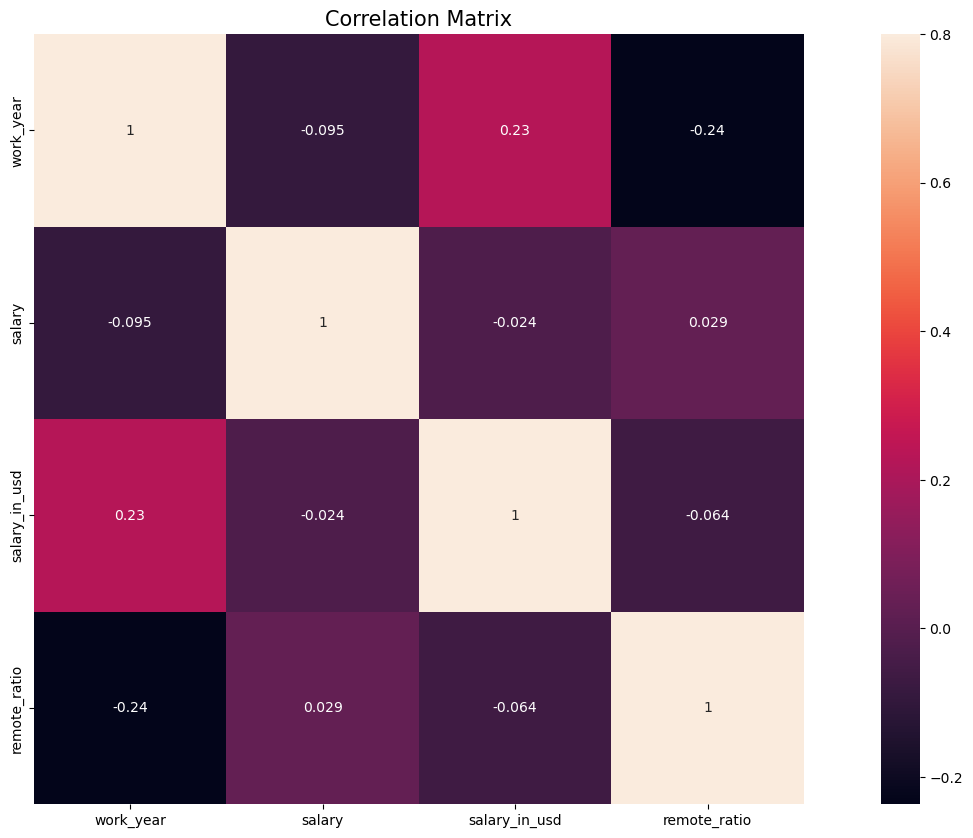

In [116]:
fig, ax = plt.subplots(figsize=(20, 10))

numeric_columns = salary.select_dtypes(include=['float64', 'int64'])

# Selecting only numeric columns
sns.heatmap(numeric_columns.corr(), vmax=0.8, square=True, annot=True)

plt.title('Correlation Matrix', fontsize=15)

plt.show()

### Grouping Work Year and Remote Ratio

In [117]:
pd.options.display.max_rows = 999

salary = pd.read_csv('ds_salaries.csv')
workyear_by_remoteratio = salary.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')
top_10_workyear = workyear_by_remoteratio.groupby('work_year').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print('Work year by Remote ratio:')
print(top_10_workyear)

Work year by Remote ratio:
    work_year  remote_ratio  count
0        2020           100     39
1        2020            50     21
2        2020             0     16
3        2021           100    120
4        2021            50     76
5        2021             0     34
6        2022           100    891
7        2022             0    711
8        2022            50     62
9        2023             0   1162
10       2023           100    593
11       2023            50     30


#### In 2020, 2021 and 2022, Employees that works fully remote are higher this maybe due to COVID-19 pandemic changing the work trend. BUT in 2023 employees mostly works onsite.

### Grouping Job Title and Experience Level¶

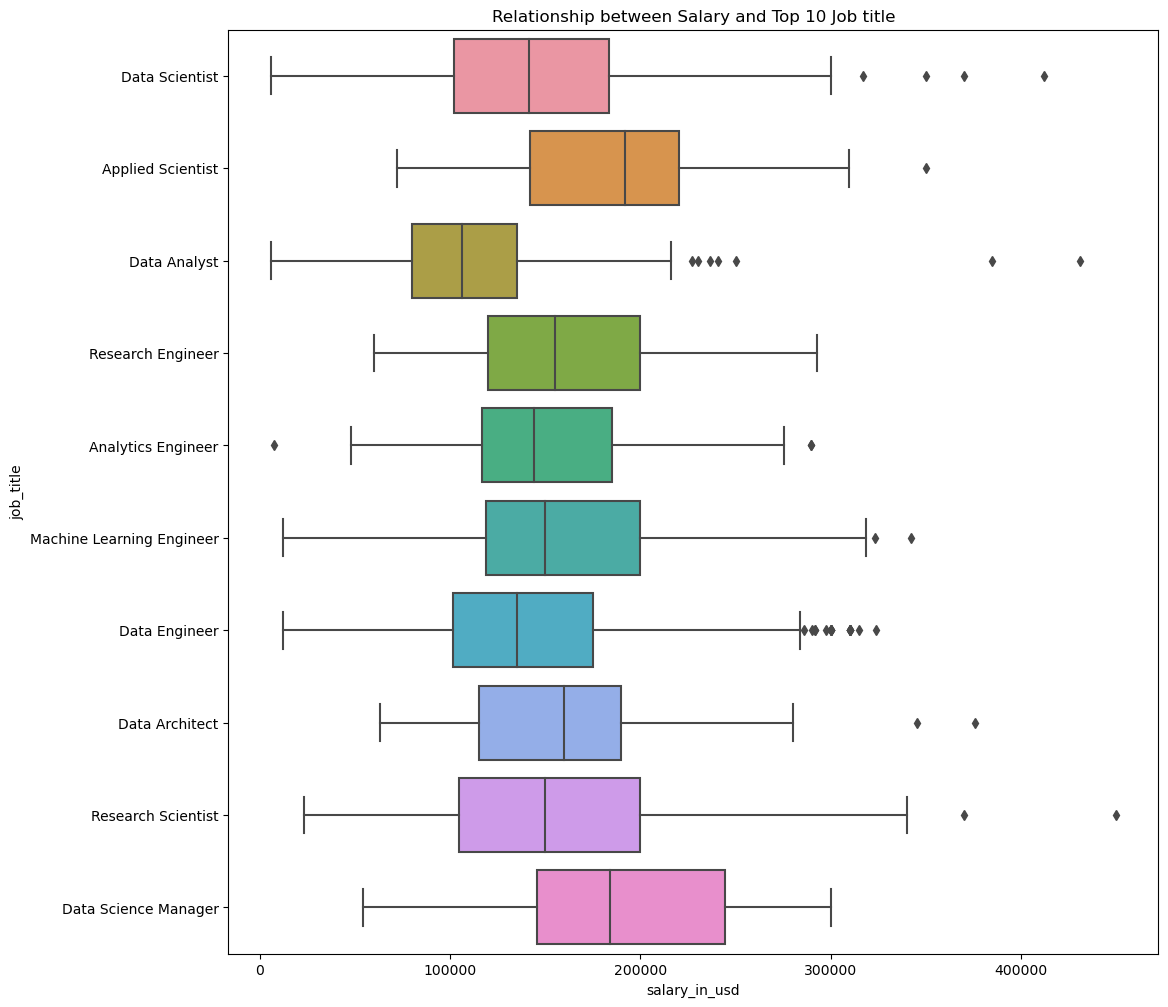

In [118]:
top_10_job_titles = salary['job_title'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 12))
sns.boxplot(x=salary[salary['job_title'].isin(top_10_job_titles)]['salary_in_usd'],
            y=salary[salary['job_title'].isin(top_10_job_titles)]['job_title'],
            showfliers=True)
plt.title('Relationship between Salary and Top 10 Job title')
plt.show()

In [119]:
result = salary.groupby('job_title').agg(salary=('salary_in_usd', 'sum'))

result = result.sort_values('salary', ascending=False)

print(result)

                                             salary
job_title                                          
Data Engineer                             148497164
Data Scientist                            118330603
Data Analyst                               66534331
Machine Learning Engineer                  44705620
Data Architect                             16333091
Analytics Engineer                         15693969
Research Scientist                         13219564
Data Science Manager                       11094169
Applied Scientist                          11035340
Research Engineer                           6035010
ML Engineer                                 5383983
Machine Learning Scientist                  4243722
Data Manager                                3381787
Data Analytics Manager                      3121340
Computer Vision Engineer                    2583650
Director of Data Science                    2146548
Data Science Consultant                     2088282
Machine Lear

#### Data Engineer has the highest pay by salary

### Insights From the Report

Based on Experience level: Senior expertise is higher by counts, Senior expertise requires experience. Executive has more pay by salary compared to mid-intermediate, entry-level and senior expertise.  
    
Based on Job Title: Total job title is 93, Data Engineer, Data Scientist and Data Analyst are the top 3 job title though other job titles are also related to those 3 job titles. 
    
Based on Salary: The salary distribution is positively skewed. The company pays the employees more in USD compared to the other currency.         
    
Based on Company size: Medium Firm is higher than the other firm by 78.5%, large Firm is 15.8% while Small Firm is 5.7%.  Medium companies provide maximum onsite opportunities and minimum fully remote work.                                                                          
The company has more employees in 2023 about 44.7% than the other work year while 2022 has 43.5%. 2021 has 8.8% .  2020 has 2.9%. Decrease in 2020 maybe due to the impact of COVID-19 pandemic.                   
    
Experience Level by Work year:There is an increase in the number of senior expertise employed in 2023 but low intake of senior expertise in 2020, there was low intake of executive in 2020,2021,2022 and 2023.   
    
Based on Employment type: The employees are mostly full time staff. The company rarely take in contract staff, freelance staff and part-time staff  . 
There was an increase in the number of full-time staff in 2023 compared to 2020.   

Based on Employee residence: Most of the employees are domiciled in USA probably because USA have much higher wages than other countries.

Based on Remote ratio: The employee works 0% of the time or 100% of the time compared to those that work 50%. This could mean that the company are either adopting a Fully remote or On-site culture rather than a Hybrid approach.  In 2020,Employees that works fully remote are higher, same applies to 2021 this maybe due to COVID-19 pandemic changing the work trend. In 2022, Employees that works fully remote are higher BUT in 2023 employees mostly works onsite.   

Data engineers seems to have more of entry-level, mid-intermediate, executive and senior expertise than Data Scientist and Data Analyst.  Full time has more pay than contract, freelance, part-time this maybe due to their committment. The medium firm pays more salary than Large and small firms. This could be due to the fact that the large firm has more financial commitment to the other sectors owing to their large size or simply put they have more employees to pay.
    
                                                             

### RECOMMENDATIONS

Company should focus on hiring and retaining professionals in the top three job titles: Data Engineer, Data Scientist and Data Analyst. These roles seem to be in high demand and are crucial to the company's operations. Consider providing career development opportunities and competitive compensation packages to attract and retain talent in these roles.
    
Company should consider conducting a salary review to ensure fair compensation across all job levels and experience levels. Address any significant discrepancies and provide salary adjustments where necessary to promote employee satisfaction and retention.

The majority of employees work in medium-sized firms and these firms provide the most onsite opportunities. Company should consider leveraging the benefits of being a medium-sized company, such as a close-knit work environment and potential for career growth, to attract and retain employees.

Implementation of strategies to maintain a steady workforce growth.

While Full-time staff is the dominant employment type, it's important to ensure that other types of employment, such as contract, freelance and part-time staff are adequately considered when needed. Evaluation of flexibility and benefits provided to different employment types to maintain a diverse and agile workforce.

Company should consider offering additional perks, such as flexible working hours, health and wellness programs and professional development allowances, to attract and retain top talent.

Majority of the employees reside in the USA, company should consider expanding recruitment efforts to diversify the employee base.

Although company seems to have a preference for either fully remote or onsite work, it is important to consider implementing a hybrid approach that allows flexibility and accomodates employee prerferences. Conduct surveys or gather feedback to assess the feasibility and desirability of a hybrid work model within the company.

Implement initiatives to enhance employee engagement and wellbeing. This can include fostering a positive work culture, promoting work-life balance, providing mental health resourses and encouraging open communication channels within the organization.